In [ ]:
import pandas as pd
df=pd.read_csv(r"/content/household_power_consumptions.csv")
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [ ]:
df.shape

(2075259, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    float64
 3   Global_reactive_power  float64
 4   Voltage                float64
 5   Global_intensity       float64
 6   Sub_metering_1         float64
 7   Sub_metering_2         float64
 8   Sub_metering_3         float64
dtypes: float64(7), object(2)
memory usage: 142.5+ MB


In [ ]:
df.isnull().sum()

,0
Date,0
Time,0
Global_active_power,25979
Global_reactive_power,25979
Voltage,25979
Global_intensity,25979
Sub_metering_1,25979
Sub_metering_2,25979
Sub_metering_3,25979


<ipython-input-18-9d76269f1d95>:18: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce')


Missing values in target (y): 8
Tuning Random Forest...


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Random Forest - Best Params: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 158}, RMSE=0.031080002941838433, MAE=0.014550041791210546, R2=0.9994637441388601
Tuning Gradient Boosting...
Gradient Boosting - Best Params: {'learning_rate': 0.13367720186661747, 'max_depth': 7, 'n_estimators': 343, 'subsample': 0.9184829137724085}, RMSE=0.027265965670184758, MAE=0.015341910258465733, R2=0.999587283609555
Tuning Linear Regression...


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Linear Regression - Best Params: {'fit_intercept': True}, RMSE=0.05458645923691635, MAE=0.03372306786950373, R2=0.9983458313007687
Tuning Neural Network...
Neural Network - Best Params: {'activation': 'relu', 'alpha': 0.006068501579464871, 'hidden_layer_sizes': (100, 100), 'learning_rate_init': 0.016599452033620267}, RMSE=0.04268801320990558, MAE=0.029099992827960382, R2=0.9989883696875222
                                                         Best Params  \
Random Forest      {'max_depth': 30, 'min_samples_leaf': 1, 'min_...   
Gradient Boosting  {'learning_rate': 0.13367720186661747, 'max_de...   
Linear Regression                            {'fit_intercept': True}   
Neural Network     {'activation': 'relu', 'alpha': 0.006068501579...   

                       RMSE       MAE  R2 Score  
Random Forest       0.03108   0.01455  0.999464  
Gradient Boosting  0.027266  0.015342  0.999587  
Linear Regression  0.054586  0.033723  0.998346  
Neural Network     0.042688    0.0291  0.99898

<ipython-input-18-9d76269f1d95>:147: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances[sorted_idx], y=sorted_feature_names, palette='viridis')


<Figure size 1000x600 with 0 Axes>

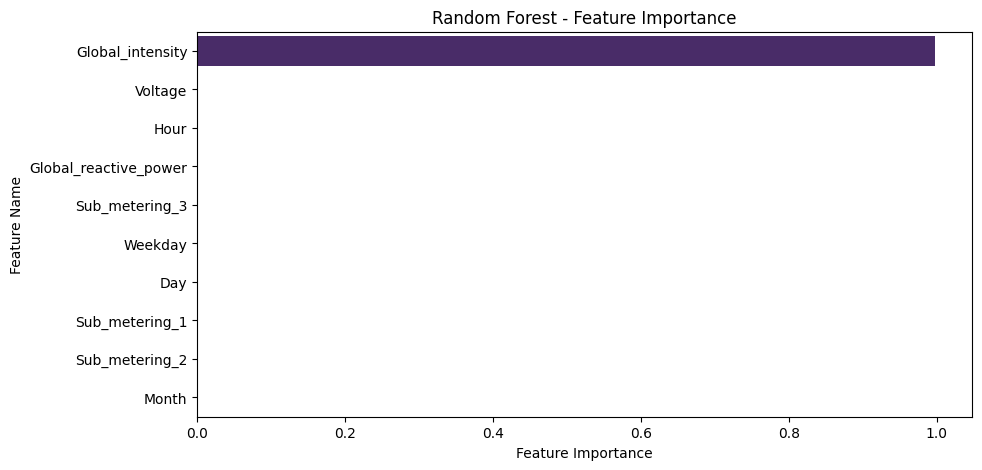

<ipython-input-18-9d76269f1d95>:147: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances[sorted_idx], y=sorted_feature_names, palette='viridis')


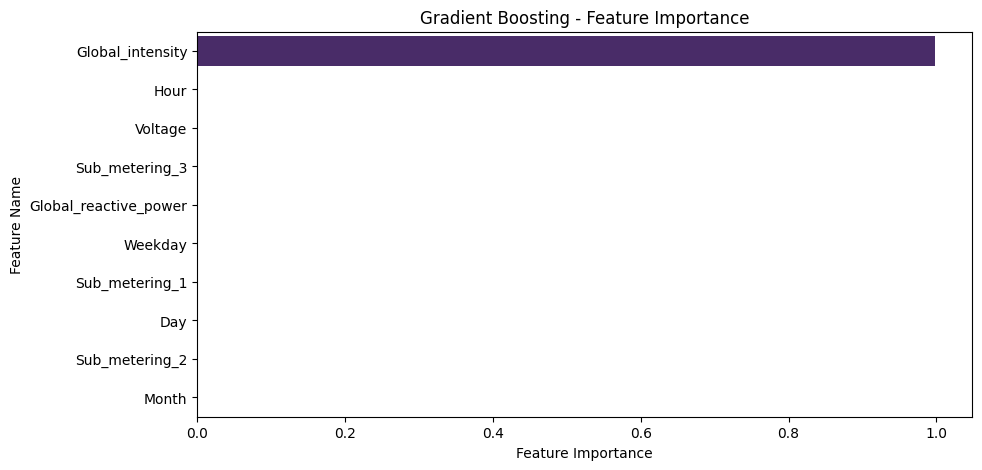

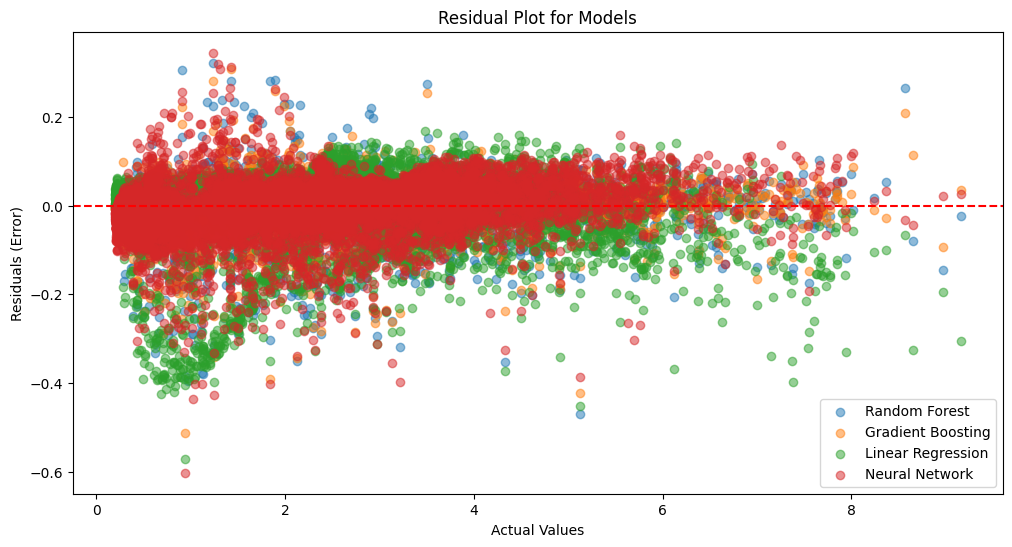

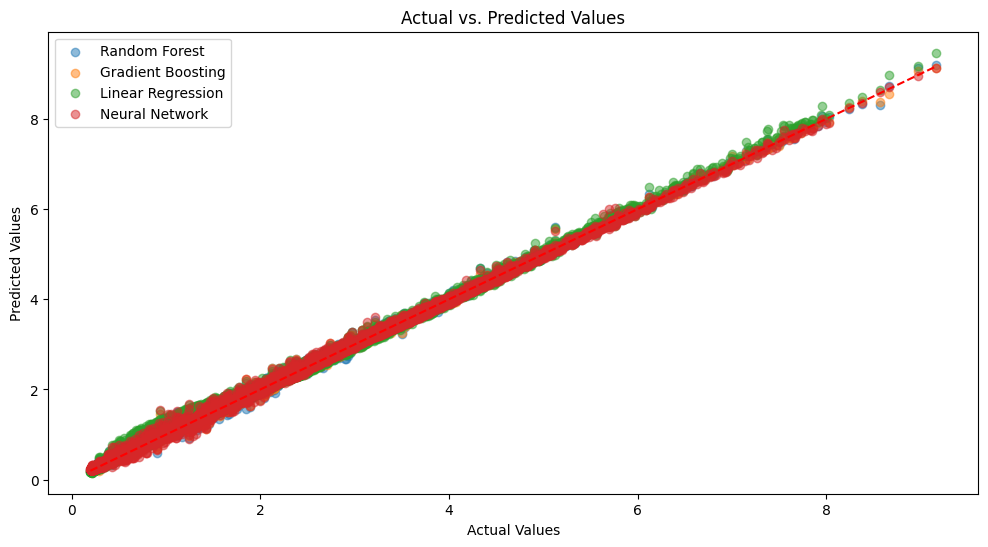

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import randint, uniform

# Load dataset
file_path = r"/content/household_power_consumptions.csv"
df = pd.read_csv(file_path, low_memory=False).head(100000)

# Convert 'Date' and 'Time' into datetime
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce')
df.drop(columns=['Date', 'Time'], inplace=True)

# Train-test split before filling missing values (avoid data leakage)
X = df.drop(columns=['Global_active_power'])
y = df['Global_active_power']

# Check for missing values in y
print(f"Missing values in target (y): {y.isnull().sum()}")

# Handle missing values by dropping or filling (depending on your choice)
y = y.dropna()  # Drop rows where target is NaN
X = X.loc[y.index]  # Align X with y after dropping NaNs

# Now split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fill missing values in X using training set statistics (median)
X_train.fillna(X_train.median(), inplace=True)
X_test.fillna(X_train.median(), inplace=True)

# Feature engineering: Extract hour, day, and month
X_train['Hour'] = X_train['Datetime'].dt.hour
X_train['Day'] = X_train['Datetime'].dt.day
X_train['Month'] = X_train['Datetime'].dt.month
X_train['Weekday'] = X_train['Datetime'].dt.weekday

X_test['Hour'] = X_test['Datetime'].dt.hour
X_test['Day'] = X_test['Datetime'].dt.day
X_test['Month'] = X_test['Datetime'].dt.month
X_test['Weekday'] = X_test['Datetime'].dt.weekday

X_train.drop(columns=['Datetime'], inplace=True)
X_test.drop(columns=['Datetime'], inplace=True)

# Save original feature names before scaling
feature_names = X_train.columns

# Normalize data (only for models that need it)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize models
models = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Linear Regression': LinearRegression(),
    'Neural Network': MLPRegressor(max_iter=2000, early_stopping=True, validation_fraction=0.1, random_state=42)
}

# Hyperparameter distributions for RandomizedSearchCV
param_distributions = {
    'Random Forest': {
        'n_estimators': randint(100, 500),
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': randint(2, 10),
        'min_samples_leaf': randint(1, 5)
    },
    'Gradient Boosting': {
        'n_estimators': randint(100, 500),
        'learning_rate': uniform(0.01, 0.2),
        'max_depth': [3, 5, 7],
        'subsample': uniform(0.8, 0.2)
    },
    'Neural Network': {
        'hidden_layer_sizes': [(50, 50), (100, 100), (150,)],
        'activation': ['relu', 'tanh'],
        'learning_rate_init': uniform(0.001, 0.1),
        'alpha': uniform(0.0001, 0.01)
    },
    'Linear Regression': {
        'fit_intercept': [True, False]
    }
}

# Train and tune models
tuned_results = {}
best_models = {}
for name, model in models.items():
    print(f"Tuning {name}...")

    # Create RandomizedSearchCV object if applicable
    if name in param_distributions:
        random_search = RandomizedSearchCV(
            estimator=model,
            param_distributions=param_distributions[name],
            n_iter=10,
            cv=3,
            scoring='neg_mean_squared_error',
            random_state=42,
            n_jobs=-1
        )
        random_search.fit(X_train, y_train)
        best_model = random_search.best_estimator_
        best_params = random_search.best_params_
    else:
        best_model = model
        best_model.fit(X_train, y_train)
        best_params = "N/A"

    # Predict and evaluate
    y_pred = best_model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    tuned_results[name] = {'Best Params': best_params, 'RMSE': rmse, 'MAE': mae, 'R2 Score': r2}
    best_models[name] = best_model  # Store best model for visualization
    print(f"{name} - Best Params: {best_params}, RMSE={rmse}, MAE={mae}, R2={r2}")

# Display results
tuned_results_df = pd.DataFrame(tuned_results).T
print(tuned_results_df)

# Visualization
plt.figure(figsize=(10, 6))

# Feature Importance Plot (for tree-based models)
for name in ['Random Forest', 'Gradient Boosting']:
    if name in best_models:
        model = best_models[name]
        feature_importances = model.feature_importances_
        sorted_idx = np.argsort(feature_importances)[::-1]

        # Fix: Use saved feature names
        sorted_feature_names = np.array(feature_names)[sorted_idx]

        plt.figure(figsize=(10, 5))
        sns.barplot(x=feature_importances[sorted_idx], y=sorted_feature_names, palette='viridis')
        plt.xlabel("Feature Importance")
        plt.ylabel("Feature Name")
        plt.title(f"{name} - Feature Importance")
        plt.show()

# Residual Plot (Errors vs. Actual Values)
plt.figure(figsize=(12, 6))
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    residuals = y_test - y_pred
    plt.scatter(y_test, residuals, alpha=0.5, label=name)
plt.axhline(0, color='red', linestyle='dashed')
plt.xlabel("Actual Values")
plt.ylabel("Residuals (Error)")
plt.title("Residual Plot for Models")
plt.legend()
plt.show()

# Actual vs. Predicted Values Plot
plt.figure(figsize=(12, 6))
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    plt.scatter(y_test, y_pred, alpha=0.5, label=name)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='dashed')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.legend()
plt.show()
